In [2]:
import numpy as np
import test_shapes as ts
import homology as hm
import gudhi as gd

A few tests of my PH code. I did more tests of this type but all the results looked good so I didn't feel the need to present 17 different counts of spheres to verify my code.

In [331]:
sphere = ts.sample_points_from_sphere([0,0,0], num_points=1000)


/Users/matthewlebar/Documents/ADA/Computing-Persistent-Homology/test_shapes.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X, Y, Z, cmap=cmap)


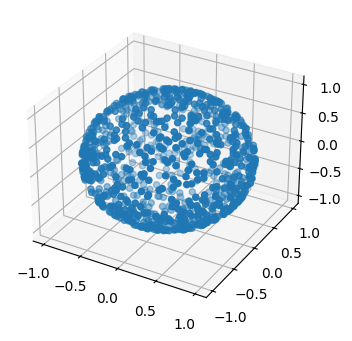

In [74]:
ts.plot_3d_shape(sphere)

In [412]:
_, two_torus = ts.get_genus_g_surface(2)

/Users/matthewlebar/Documents/ADA/Computing-Persistent-Homology/test_shapes.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X, Y, Z, cmap=cmap)


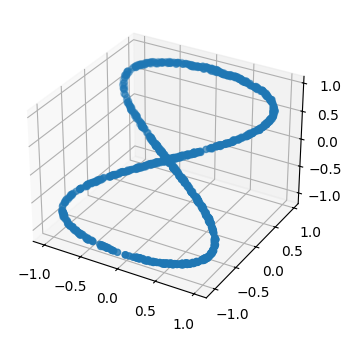

In [ ]:
ts.plot_3d_shape(two_torus)

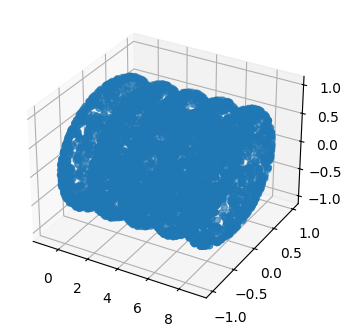

In [443]:
spheres = ts.get_n_spheres(5)
ts.plot_3d_shape(spheres)

Test my PH code on a collection of spheres:

In [433]:
complex, dict, gd_tree = hm.create_persistence_complex(spheres)

In [434]:
interval_sets = hm.compute_intervals(complex, dict)

In [435]:
gd_intervals = gd_tree.persistence(homology_coeff_field = 2)

In [457]:
print(len(interval_sets[0]), len(interval_sets[1]), len(interval_sets[2]))

5000 6048 2373


In [458]:
print(len(gd_tree.persistence_intervals_in_dimension(0)), len(gd_tree.persistence_intervals_in_dimension(1)), len(gd_tree.persistence_intervals_in_dimension(2)))

5000 6049 2388


The numbers are off by a few because of very small persistence intervals being treated slightly differently. I'll show this after the barcodes. Note the barcodes look different because I have them sorted by length, not dimension and because I compute degree (the times for the interval) slightly differently than they do. 

/usr/local/lib/python3.11/site-packages/gudhi/persistence_graphical_tools.py:107: UserWarning: There are 13437 intervals given as input, whereas max_intervals is set to 10.
  warnings.warn(


<Axes: title={'center': 'Persistence barcode'}>

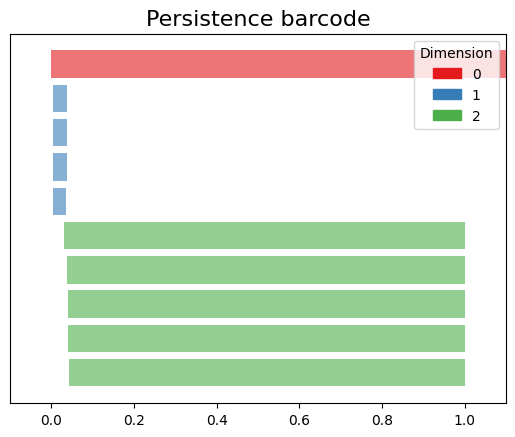

In [436]:
gd.plot_persistence_barcode(gd_intervals, max_intervals= 10)

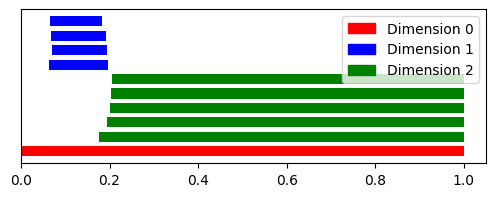

In [437]:
hm.display_intervals(interval_sets, max_intervals=10)

As promised:

In [465]:
unf_complex, unf_dict, unf_gd_tree = hm.create_persistence_complex(spheres)
unf_interval_sets = hm.compute_intervals(unf_complex, unf_dict, remove_small_intervals=False)
unf_gd_intervals = unf_gd_tree.persistence(homology_coeff_field = 2, min_persistence=-1)

In [466]:
print(len(unf_interval_sets[0]), len(unf_interval_sets[1]), len(unf_interval_sets[2]))

5000 29672 28481


In [467]:
print(len(unf_gd_tree.persistence_intervals_in_dimension(0)), len(unf_gd_tree.persistence_intervals_in_dimension(1)), len(unf_gd_tree.persistence_intervals_in_dimension(2)))

5000 29672 28481


So the underlying calculation is the same.

Now onto a different shape:

/Users/matthewlebar/Documents/ADA/Computing-Persistent-Homology/test_shapes.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X, Y, Z, cmap=cmap)


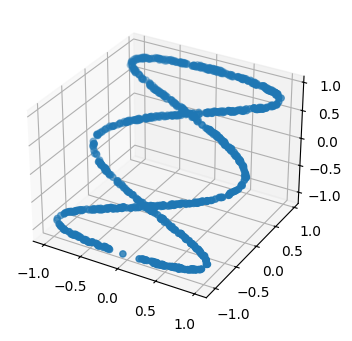

In [441]:
_, three_torus = ts.get_genus_g_surface(3)
ts.plot_3d_shape(three_torus)

In [438]:
t_complex, t_dict, t_gd_tree = hm.create_persistence_complex(three_torus)
t_interval_sets = hm.compute_intervals(t_complex, t_dict)
t_gd_intervals = t_gd_tree.persistence(homology_coeff_field = 2)

In [455]:
print(len(t_interval_sets[0]), len(t_interval_sets[1]), len(t_interval_sets[2]))

1000 642 110


In [456]:
print(len(t_gd_tree.persistence_intervals_in_dimension(0)), len(t_gd_tree.persistence_intervals_in_dimension(1)), len(t_gd_tree.persistence_intervals_in_dimension(2)))

1000 642 110


/usr/local/lib/python3.11/site-packages/gudhi/persistence_graphical_tools.py:107: UserWarning: There are 1752 intervals given as input, whereas max_intervals is set to 10.
  warnings.warn(


<Axes: title={'center': 'Persistence barcode'}>

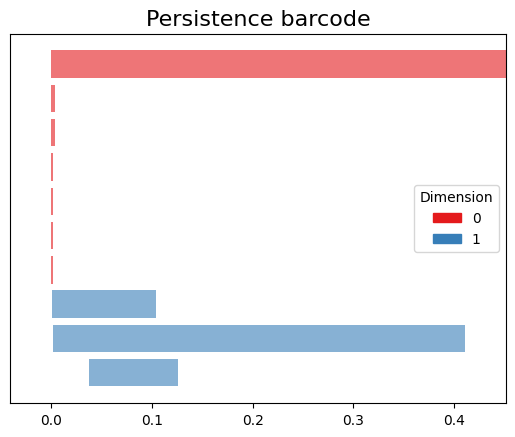

In [ ]:
gd.plot_persistence_barcode(t_gd_intervals, max_intervals=10)

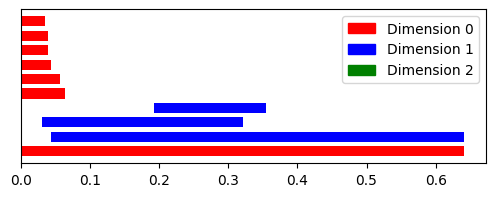

In [440]:
hm.display_intervals(t_interval_sets, max_intervals=10)

Testing for similar interval sets with small datasets... I did this earlier but deleted my work, so I redid it underneath the shapes. 

In [452]:
small_complex, small_dict, small_gd_tree = hm.create_persistence_complex([[1,3], [4,2], [2,4], [8, 3], [7, 12], [9, 6], [13, 0], [12, 12], [5, 8], [9,2]])
small_interval_sets = hm.compute_intervals(small_complex, small_dict)
small_gd_intervals = small_gd_tree.persistence(homology_coeff_field = 2)

In [453]:
print(len(small_interval_sets[0]), len(small_interval_sets[1]), len(small_interval_sets[2]))

10 2 0


In [454]:
print(len(small_gd_tree.persistence_intervals_in_dimension(0)), len(small_gd_tree.persistence_intervals_in_dimension(1)), len(small_gd_tree.persistence_intervals_in_dimension(2)))

10 2 0


<Axes: title={'center': 'Persistence barcode'}>

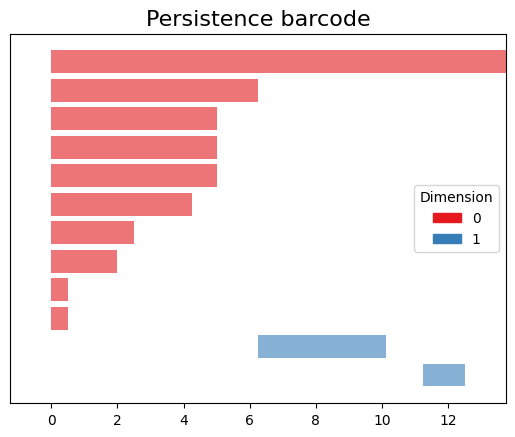

In [470]:
gd.plot_persistence_barcode(small_gd_intervals, max_intervals=12)

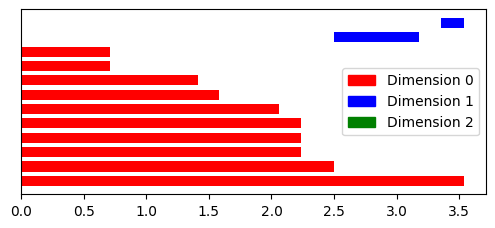

In [471]:
hm.display_intervals(small_interval_sets, max_intervals=12)

Any differences here I think are attributable to the way degree is calculated. Clearly the basic structure is the same in both.